In [1]:
%matplotlib inline

import os, subprocess, tarfile
from glob import glob
import numpy as np
import xarray as xr
import xesmf as xe
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs

import warnings
warnings.filterwarnings('ignore')

seconds_per_day=60.*60.*24.
seconds_per_year=365.*seconds_per_day
carbon_molar_mass=12.011
cobalt_c_2_n = 106./16.

In [2]:
path_root='/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT'

#case,machine_target='OM4p5_CORE2_IAF_COBALT_abio_csf_mle200','gfdl.ncrc4-intel16-prod'

case,machine_target='OM4p5_CORE2_IAF_gzCOBALT-120220','gfdl.ncrc4-intel16-prod'


In [3]:
phyto_varlist = ['di', 'smp', 'lgp']
#zoo_varlist = ['smz', 'mdz', 'lgz']
zoo_varlist = ['smz', 'mdz', 'lgz', 'smt', 'lgt']

In [4]:
tmpdir = '/work/Jessica.Luo/tmp/'+case
if not os.path.exists(tmpdir):
    os.mkdir(tmpdir)
    print('created directory: '+tmpdir)
else:
    print('temporary directory exists: '+tmpdir)

temporary directory exists: /work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-120220


In [5]:
yrs=['1953']
mmdd='0101'
tar_path=os.path.join(path_root, case, machine_target, 'history')
files=[glob(os.path.join(tar_path,yr)+'*.nc.tar')[0] for yr in yrs]
print(files)

['/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT/OM4p5_CORE2_IAF_gzCOBALT-120220/gfdl.ncrc4-intel16-prod/history/19530101.nc.tar']


In [6]:
FORCE_EXTRACT=False

for i,yr in enumerate(yrs):
    tmp_prefix=tmpdir+'/'+yr+mmdd
    test_file=tmp_prefix+'.ocean_cobalt_omip_tracers_month_z.nc'
    
    if not os.path.isfile(test_file) or FORCE_EXTRACT:
        print('extracting: '+files[i])
        [subprocess.call(['dmget', f]) for f in files]
        tarfile.open(files[i]).extractall(path=tmpdir)
    else:
        print('already extracted: '+files[i])
        
    files_in_dir=glob(tmp_prefix+'*.nc')
    #files_in_dir

already extracted: /archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT/OM4p5_CORE2_IAF_gzCOBALT-120220/gfdl.ncrc4-intel16-prod/history/19530101.nc.tar


In [7]:
diagTypes = ['ocean_cobalt_omip_tracers_month_z', 'ocean_cobalt_tracers_int'] 
open_files = [tmpdir+'/'+yr+mmdd+'.'+x+'.nc' for yr in yrs for x in diagTypes]
grid_file=tmpdir+'/'+yr+mmdd+'.ocean_static.nc'
ds=xr.open_mfdataset(open_files, combine='by_coords')
grid=xr.open_dataset(grid_file)

ds = ds.rename({'xh': 'lon', 'yh': 'lat'})

open_files

['/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-120220/19530101.ocean_cobalt_omip_tracers_month_z.nc',
 '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-120220/19530101.ocean_cobalt_tracers_int.nc']

In [8]:
ds = ds.drop(['average_T1','average_T2','average_DT','time_bnds'])
ds

<xarray.Dataset>
Dimensions:          (lat: 576, lon: 720, nv: 2, time: 12, z_i: 36, z_l: 35)
Coordinates:
  * lon              (lon) float64 -299.8 -299.2 -298.8 ... 58.75 59.25 59.75
  * lat              (lat) float64 -77.91 -77.72 -77.54 ... 89.47 89.68 89.89
  * z_l              (z_l) float64 2.5 10.0 20.0 32.5 ... 5.5e+03 6e+03 6.5e+03
  * z_i              (z_i) float64 0.0 5.0 15.0 ... 5.75e+03 6.25e+03 6.75e+03
  * time             (time) object 1953-01-16 12:00:00 ... 1953-12-16 12:00:00
  * nv               (nv) float64 1.0 2.0
Data variables:
    volcello         (time, z_l, lat, lon) float32 dask.array<chunksize=(12, 35, 576, 720), meta=np.ndarray>
    dissic           (time, z_l, lat, lon) float32 dask.array<chunksize=(12, 35, 576, 720), meta=np.ndarray>
    dissoc           (time, z_l, lat, lon) float32 dask.array<chunksize=(12, 35, 576, 720), meta=np.ndarray>
    phyc             (time, z_l, lat, lon) float32 dask.array<chunksize=(12, 35, 576, 720), meta=np.ndarray>
    z

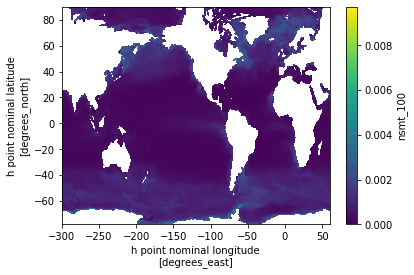

In [9]:
ds.nsmt_100.mean(dim='time').plot()

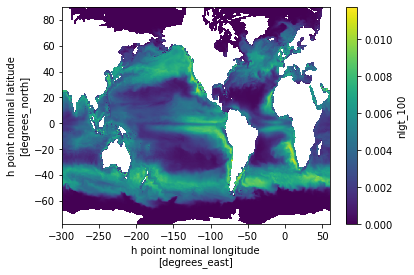

In [10]:
ds.nlgt_100.mean(dim='time').plot()

In [11]:
import pandas as pd
dt2=pd.read_csv('dt2cast.csv')
dt2

,lon,lat,chl_gs_mean,Appendicularians,Thaliaceans,Copepods,Tunicates
0,-166.5,-78.5,0.857365,NaN,NaN,NaN,NaN
1,-165.5,-78.5,0.913721,NaN,NaN,NaN,NaN
2,-164.5,-78.5,0.795582,0.00146,NaN,NaN,0.00146
3,-163.5,-78.5,0.631098,NaN,NaN,NaN,NaN
4,-179.5,-77.5,3.811890,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
38379,-8.5,82.5,0.337479,NaN,NaN,NaN,NaN
38380,-25.5,83.5,0.411051,NaN,NaN,NaN,NaN
38381,-24.5,83.5,0.297907,NaN,NaN,NaN,NaN
38382,-23.5,83.5,0.612870,NaN,NaN,NaN,NaN


In [12]:
apps=dt2[['lon','lat','chl_gs_mean','Appendicularians']].dropna()
apps

,lon,lat,chl_gs_mean,Appendicularians
2,-164.5,-78.5,0.795582,0.001460
23,-160.5,-77.5,2.615977,0.000668
37,175.5,-77.5,0.975523,0.467404
39,177.5,-77.5,1.890830,0.244488
40,178.5,-77.5,2.690799,0.003341
...,...,...,...,...
38216,-9.5,80.5,1.108950,9.377087
38217,-8.5,80.5,1.246928,0.403347
38218,-7.5,80.5,1.351655,1.610997
38320,21.5,81.5,0.417073,2.901468


In [13]:
thals=dt2[['lon','lat','chl_gs_mean','Thaliaceans']].dropna()
thals

,lon,lat,chl_gs_mean,Thaliaceans
7,-176.5,-77.5,3.864186,0.000000
12,-171.5,-77.5,3.436709,0.000000
15,-168.5,-77.5,4.527539,0.000000
17,-166.5,-77.5,3.643188,0.000000
52,-169.5,-76.5,2.814868,0.006319
...,...,...,...,...
35469,-6.5,60.5,0.886247,3.120000
35587,-13.5,61.5,0.830592,0.040560
35589,-11.5,61.5,1.008016,0.040560
35700,-17.5,62.5,0.960750,0.081120


In [14]:
apps_locs=xr.Dataset()
apps_locs['lon']=xr.DataArray(data=apps.lon.values, dims=('location'))
apps_locs['lat']=xr.DataArray(data=apps.lat.values, dims=('location'))

thals_locs=xr.Dataset()
thals_locs['lon']=xr.DataArray(data=thals.lon.values, dims=('location'))
thals_locs['lat']=xr.DataArray(data=thals.lat.values, dims=('location'))

thals_locs

<xarray.Dataset>
Dimensions:  (location: 5322)
Dimensions without coordinates: location
Data variables:
    lon      (location) float64 -176.5 -171.5 -168.5 ... -11.5 -17.5 -15.5
    lat      (location) float64 -77.5 -77.5 -77.5 -77.5 ... 61.5 61.5 62.5 62.5

In [15]:
regridder_apps = xe.Regridder(ds, apps_locs, 'bilinear', locstream_out=True, reuse_weights=True)

Reuse existing file: bilinear_576x720_1x3809.nc


In [16]:
regridder_thals = xe.Regridder(ds, thals_locs, 'bilinear', locstream_out=True, reuse_weights=True)

Reuse existing file: bilinear_576x720_1x5322.nc


In [17]:
ds_apps_rg = regridder_apps(ds)
ds_apps_rg

using dimensions ('lat', 'lon') from data variable volcello as the horizontal dimensions for this dataset.


<xarray.Dataset>
Dimensions:          (locations: 3809, nv: 2, time: 12, z_i: 36, z_l: 35)
Coordinates:
  * z_l              (z_l) float64 2.5 10.0 20.0 32.5 ... 5.5e+03 6e+03 6.5e+03
  * z_i              (z_i) float64 0.0 5.0 15.0 ... 5.75e+03 6.25e+03 6.75e+03
  * time             (time) object 1953-01-16 12:00:00 ... 1953-12-16 12:00:00
  * nv               (nv) float64 1.0 2.0
    lon              (locations) float64 -164.5 -160.5 175.5 ... -7.5 21.5 31.5
    lat              (locations) float64 -78.5 -77.5 -77.5 ... 80.5 81.5 81.5
Dimensions without coordinates: locations
Data variables:
    volcello         (time, z_l, locations) float64 dask.array<chunksize=(12, 35, 3809), meta=np.ndarray>
    dissic           (time, z_l, locations) float64 dask.array<chunksize=(12, 35, 3809), meta=np.ndarray>
    dissoc           (time, z_l, locations) float64 dask.array<chunksize=(12, 35, 3809), meta=np.ndarray>
    phyc             (time, z_l, locations) float64 dask.array<chunksize=(12, 35, 

In [18]:
ds_thals_rg = regridder_apps(ds)
ds_thals_rg

using dimensions ('lat', 'lon') from data variable volcello as the horizontal dimensions for this dataset.


<xarray.Dataset>
Dimensions:          (locations: 3809, nv: 2, time: 12, z_i: 36, z_l: 35)
Coordinates:
  * z_l              (z_l) float64 2.5 10.0 20.0 32.5 ... 5.5e+03 6e+03 6.5e+03
  * z_i              (z_i) float64 0.0 5.0 15.0 ... 5.75e+03 6.25e+03 6.75e+03
  * time             (time) object 1953-01-16 12:00:00 ... 1953-12-16 12:00:00
  * nv               (nv) float64 1.0 2.0
    lon              (locations) float64 -164.5 -160.5 175.5 ... -7.5 21.5 31.5
    lat              (locations) float64 -78.5 -77.5 -77.5 ... 80.5 81.5 81.5
Dimensions without coordinates: locations
Data variables:
    volcello         (time, z_l, locations) float64 dask.array<chunksize=(12, 35, 3809), meta=np.ndarray>
    dissic           (time, z_l, locations) float64 dask.array<chunksize=(12, 35, 3809), meta=np.ndarray>
    dissoc           (time, z_l, locations) float64 dask.array<chunksize=(12, 35, 3809), meta=np.ndarray>
    phyc             (time, z_l, locations) float64 dask.array<chunksize=(12, 35, 

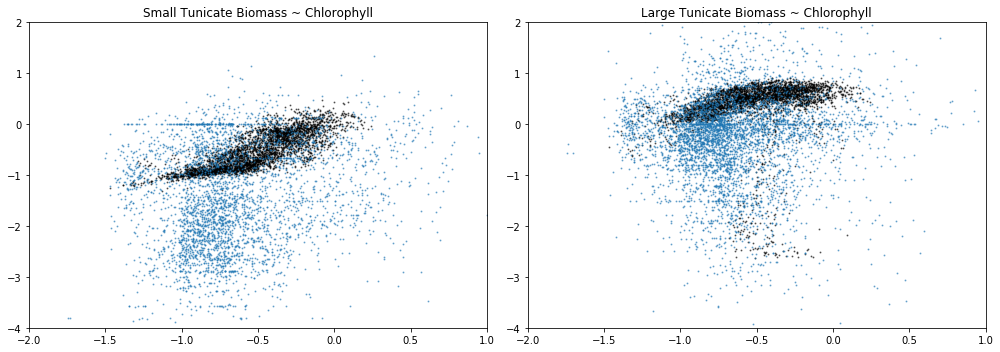

In [19]:
fig=plt.figure(figsize=(14,5))
gs=gridspec.GridSpec(1,2)

fig.add_subplot(gs[0,0])
y=ds_apps_rg.nsmt_100.mean(dim='time') * carbon_molar_mass * cobalt_c_2_n * 1e3 / 100 # mg C m-3
x=ds_apps_rg.chl.isel(z_l=0).mean(dim='time') * 1e6 # mg m-3
plt.scatter(x=np.log10(x),y=np.log10(y), alpha=0.5,s=1, c='black')
yd=dt2.Appendicularians
xd=dt2.chl_gs_mean
plt.scatter(x=np.log10(xd),y=np.log10(yd), alpha=0.5,s=1, c='C0')
plt.ylim(-4,2)
plt.xlim(-2,1)
plt.title('Small Tunicate Biomass ~ Chlorophyll')

fig.add_subplot(gs[0,1])
y=ds_thals_rg.nlgt_100.mean(dim='time') * carbon_molar_mass * cobalt_c_2_n * 1e3 / 100 # mg C m-2
x=ds_thals_rg.chl.isel(z_l=0).mean(dim='time') * 1e6 # mg m-3
plt.scatter(x=np.log10(x),y=np.log10(y), alpha=0.5,s=1, c='black')
yd=dt2.Thaliaceans
xd=dt2.chl_gs_mean
plt.scatter(x=np.log10(xd),y=np.log10(yd), alpha=0.5,s=1, c='C0')
plt.ylim(-4,2)
plt.xlim(-2,1)
plt.title('Large Tunicate Biomass ~ Chlorophyll')

plt.tight_layout()
plt.savefig('plots/'+case.replace('OM4p5_CORE2_IAF_','')+'_regrid_onto_obs_SmT+LgT-Chl.png', bbox_inches='tight')